<a href="https://colab.research.google.com/github/cpetridis/Handwritten-Digits-Classification/blob/main/Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [95]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [96]:
print(f"We got {len(X_train)} images for training")
print(f"We got {len(X_test)} images for testing")
print(f"====================")
print(f"Dimensions for training data: {X_train[0].shape}")
print(f"Dimensions for testing  data: {X_test[0].shape}")

We got 60000 images for training
We got 10000 images for testing
Dimensions for training data: (28, 28)
Dimensions for testing  data: (28, 28)


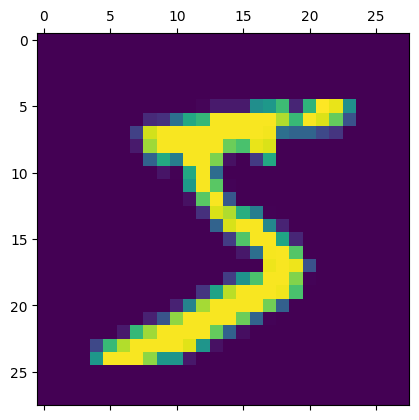

In [97]:
plt.matshow(X_train[0])

### Now, we want to convert the 2D array to an 1D array

In [98]:
#first, let's scale our data
X_train = X_train / 255
X_test = X_test / 255

In [99]:
X_train_fl = X_train.reshape(len(X_train), X_train[0].shape[0]*X_train[0].shape[1])
X_test_fl = X_test.reshape(len(X_test), X_test[0].shape[0]*X_test[0].shape[1])

In [100]:
print(f"X_train_fl.shape : {X_train_fl.shape}")
print(f"X_test_fl.shape : {X_test_fl.shape}")

X_train_fl.shape : (60000, 784)
X_test_fl.shape : (10000, 784)


In [101]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [102]:
model.fit(X_train_fl, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4656 - accuracy: 0.8783
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3040 - accuracy: 0.9155
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9214
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9237
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9261
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2624 - accuracy: 0.9275
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2585 - accuracy: 0.9286
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2551 - accuracy: 0.9297
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2530 - accuracy: 0.9303
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.251

In [103]:
model.evaluate(X_test_fl, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2646 - accuracy: 0.9274


[0.2645995318889618, 0.9273999929428101]

### Let's try to make some predictions on that

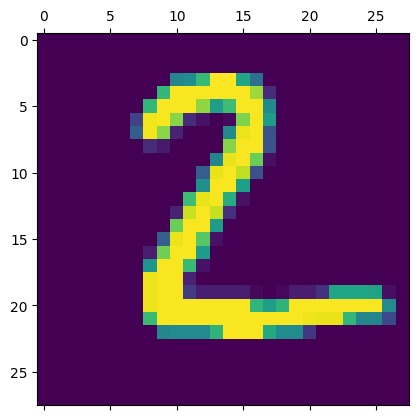

In [104]:
plt.matshow(X_test[1])


We will try to predict what digit is represented in the image above

In [105]:
y_predictions = model.predict(X_test_fl)
print(y_predictions[1]) # this is an array containing the possibility for each digit

313/313 [==============================] - 0s 1ms/step
[4.9172199e-01 1.1449891e-02 9.9982280e-01 1.9806868e-01 2.8553937e-11
 8.9924693e-01 9.4303244e-01 1.4170963e-15 1.3467772e-01 6.5203815e-12]


In [106]:
# we need the largest one
predicted_digit = np.argmax(y_predictions[1])
print(f"Prediction ====> {predicted_digit}")

Prediction ====> 2


In [107]:
predicted_labels = [np.argmax(i) for i in y_predictions]
predicted_labels[:5]

[7, 2, 1, 0, 4]

In [108]:
#actual labels
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

So, we can say that the first five images have been predicted correctly
Let's visualize the predictions (correct & false)

Text(95.72222222222221, 0.5, 'Actual')

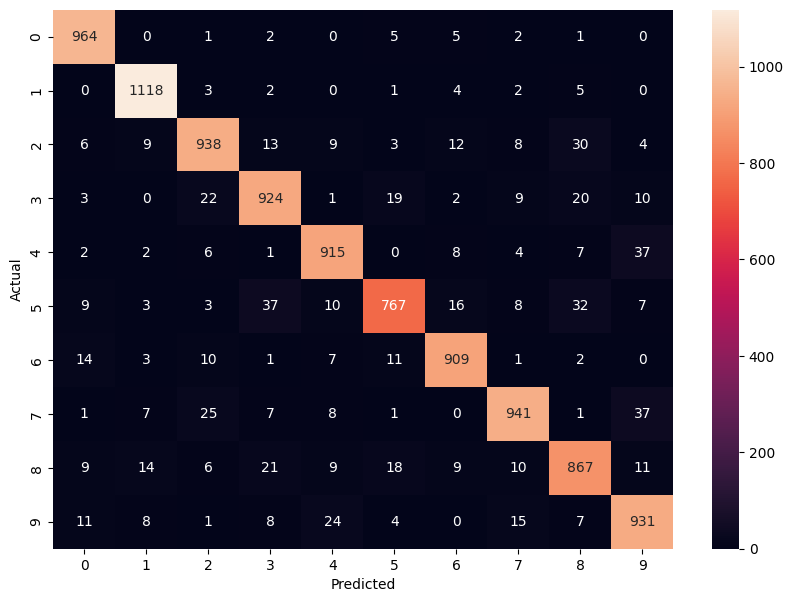

In [109]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=predicted_labels)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [110]:
# let's count the wrong predictions
sum_wrong_predictions = np.sum(cm) - np.trace(cm)
print("Wrong predictions:", sum_wrong_predictions)


Wrong predictions: 726


Since we have some wrong predictions it is clear that we can make our model much better.

In [111]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_fl, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2760 - accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1274 - accuracy: 0.9629
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0879 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0671 - accuracy: 0.9795
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0524 - accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0430 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0346 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0283 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0239 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.019

In [112]:
model.evaluate(X_test_fl, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0815 - accuracy: 0.9785


[0.08152790367603302, 0.9785000085830688]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Actual')

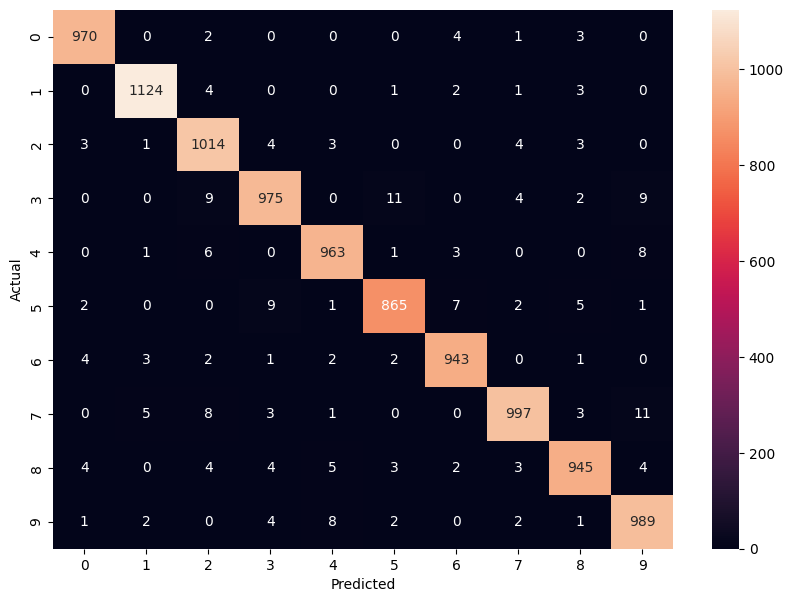

In [113]:
y_predictions = model.predict(X_test_fl)
predicted_labels = [np.argmax(i) for i in y_predictions]
cm = tf.math.confusion_matrix(labels=y_test, predictions=predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [114]:
sum_wrong_predictions = np.sum(cm) - np.trace(cm)
print("Wrong predictions:", sum_wrong_predictions)

Wrong predictions: 215


## It is clear that the model is better now. A very small change in the neural network's architecture changed a lot its performance.